In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import requests
import os
plt.style.use(["dark_background"])

2024-03-19 11:43:49.146094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 11:43:49.146194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 11:43:49.425053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Workflow
---

### 1. Understanding the SVHN Dataset
- **Objective**: Familiarize yourself with the SVHN dataset, its structure, and the type of data it contains.
- **Actions**: Study the dataset's documentation and explore a few samples to understand the format and challenges (e.g., image size, color, diversity in house numbers).

### 2. Setting Up Your Environment
- **Objective**: Prepare your software and hardware environment for the project.
- **Actions**:
    - Ensure you have a suitable programming environment (like Python with TensorFlow or PyTorch).
    - Set up necessary libraries and dependencies (e.g., NumPy, Matplotlib for visualization).
    - If using a GPU, ensure drivers and necessary libraries (like CUDA) are installed.

### 3. Data Preprocessing
- **Objective**: Prepare the SVHN dataset for training and testing.
- **Actions**:
    - Download and load the SVHN dataset.
    - Normalize the images and labels (e.g., scale pixel values, one-hot encode labels).
    - Split the dataset into training, validation, and testing sets.
    - Implement data augmentation techniques if necessary.

### 4. Implementing the New Activation Function
- **Objective**: Code your new activation function.
- **Actions**:
    - Define the mathematical function in your chosen programming language.
    - Ensure the function is differentiable as it will be used in backpropagation.
    - Test the function independently to verify its correctness.

### 5. Model Architecture
- **Objective**: Design a neural network model suitable for the SVHN dataset.
- **Actions**:
    - Choose an appropriate model architecture (e.g., a Convolutional Neural Network).
    - Integrate your new activation function into the model.
    - Define the optimizer, loss function, and metrics for model evaluation.

### 6. Training the Model
- **Objective**: Train the model on the SVHN dataset.
- **Actions**:
    - Train the model using the training set, and validate it using the validation set.
    - Monitor performance metrics like loss and accuracy.
    - Experiment with different hyperparameters (e.g., learning rate, batch size) for optimal performance.

### 7. Evaluation and Testing
- **Objective**: Evaluate the performance of your model.
- **Actions**:
    - Test the model on the test set.
    - Analyze the results using various metrics (e.g., accuracy, precision, recall).
    - Compare the performance with baseline models or other activation functions.

### 8. Documentation and Analysis
- **Objective**: Document your findings and analyze the performance of the new activation function.
- **Actions**:
    - Document the experiment setup, model architecture, and training process.
    - Analyze how the new activation function affected the model’s performance.
    - Compare with existing activation functions and draw conclusions.

### 9. Sharing Results
- **Objective**: Share your findings with the community or stakeholders.
- **Actions**:
    - Prepare a report or presentation summarizing your methodology, results, and conclusions.
    - Consider publishing your code and results in a repository or submitting them to relevant journals or conferences.

### 10. Iterative Improvement
- **Objective**: Refine your approach based on feedback and results.
- **Actions**:
    - Gather feedback from peers or the community.
    - Make iterative improvements to the activation function or model based on this feedback.
    - Continuously evaluate the performance after each iteration.

# The SVHN Dataset
---

The Street View House Numbers (SVHN) dataset is a widely-used benchmark in the field of machine learning, particularly for tasks involving image recognition and digit classification. Here's a detailed description of the dataset:

### Overview
- **Purpose**: The SVHN dataset is primarily used for developing and evaluating machine learning models, especially in the context of computer vision and object recognition tasks.
- **Content**: It contains images of house numbers collected from Google Street View images. These are real-world, natural images of house numbers, as opposed to hand-written or artificially generated digits.

### Characteristics of the Images
- **Format**: The images are in color and are in the JPEG format.
- **Resolution**: They vary in size but often need resizing for consistent input to models.
- **Composition**: Each image typically includes a number (which can be a single digit or a sequence of digits) and some background visual context, like parts of the house or street.
- **Variability**: The dataset includes a wide variety of fonts, colors, styles, and occlusions, making it more complex and realistic compared to simpler digit datasets like MNIST.

### Dataset Structure
- **Two Formats**:
  - **Original Images**: Contains the entire picture of a house with a number on it.
  - **Cropped Digits**: Contains cropped images centered around each digit. These are more directly comparable to other digit datasets.
- **Labels**: Each image is labeled with the number it represents, which can range from 0 to 9.

### Data Split
- **Training Set**: Contains a larger portion of the images, used for training machine learning models.
- **Test Set**: A separate set of images used to evaluate the performance of trained models.
- **Extra Set**: Some versions of the dataset include an 'extra' set of images, which are somewhat less difficult than those in the standard training set and can be used for additional training.

### Use in Research and Development
- **Challenges**: The SVHN dataset is challenging due to factors like varying lighting conditions, low resolution, occlusions, and diverse backgrounds.
- **Applications**: It's widely used in tasks like digit recognition, object detection, and more complex challenges such as sequence recognition or contextual understanding.

### Availability
- The dataset is publicly available and can be downloaded from its official website. It is often provided in a format that is ready to be used with common machine learning frameworks.

The SVHN dataset is considered more challenging than simpler digit datasets like MNIST due to the complexity and variability of the images. It provides a more realistic benchmark for real-world applications of image recognition technologies.

# Acquiring the data

In [2]:
def download_svhn_data(url, path):
    response = requests.get(url, stream=True)
    with open(path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)

def load_svhn_dataset(url, path):
    if not os.path.exists(path):
        print(f"Downloading {url}...")
        download_svhn_data(url, path)
    return scipy.io.loadmat(path)

# URLs for the SVHN dataset (train and test)
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"

# Paths where the datasets will be saved
train_path = "train_32x32.mat"
test_path = "test_32x32.mat"

# Load the datasets
train_data = load_svhn_dataset(train_url, train_path)
test_data = load_svhn_dataset(test_url, test_path)

# Extract images and labels
x_train = np.array(train_data['X']).transpose((3, 0, 1, 2))
y_train = train_data['y'].flatten()
x_test = np.array(test_data['X']).transpose((3, 0, 1, 2))
y_test = test_data['y'].flatten()

# Print shapes of the loaded dataset as a basic check
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (73257, 32, 32, 3)
Training labels shape: (73257,)
Test data shape: (26032, 32, 32, 3)
Test labels shape: (26032,)


# Data Exploration

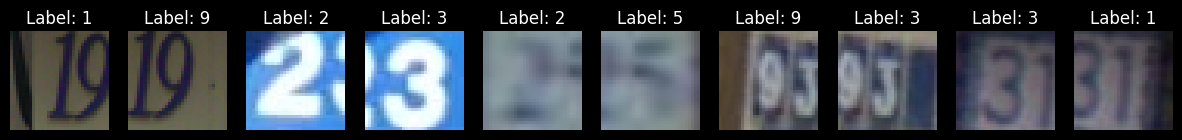

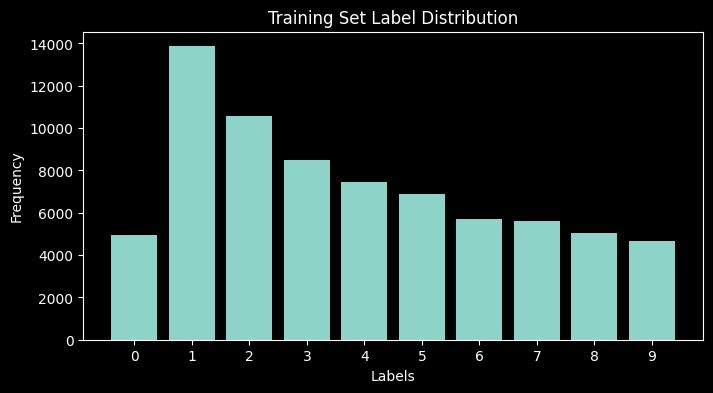

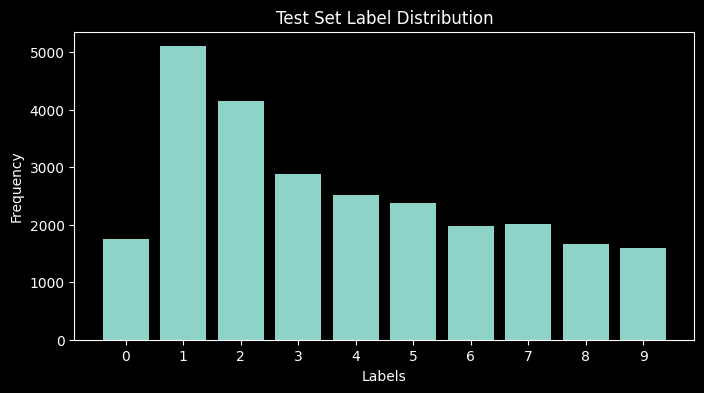

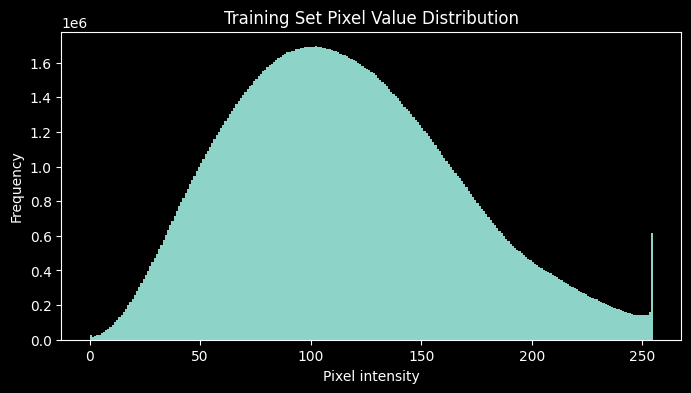

In [3]:
def load_svhn_data(file_path):
    data = scipy.io.loadmat(file_path)
    images = np.array(data['X']).transpose((3, 0, 1, 2))
    labels = data['y'].flatten()
    labels[labels == 10] = 0  # Replace label 10 with 0
    return images, labels

# Load dataset (assuming you have already downloaded it as shown in previous steps)
x_train, y_train = load_svhn_data('train_32x32.mat')
x_test, y_test = load_svhn_data('test_32x32.mat')

# Function to visualize images from the dataset
def visualize_data(images, labels, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

# Visualize some training images
visualize_data(x_train, y_train)

# Explore label distribution
def plot_label_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(8, 4))
    plt.bar(unique, counts)
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.xticks(unique)
    plt.show()

# Plotting label distribution for training and test sets
plot_label_distribution(y_train, 'Training Set Label Distribution')
plot_label_distribution(y_test, 'Test Set Label Distribution')

# Explore pixel value distribution
def plot_pixel_distribution(images, title):
    plt.figure(figsize=(8, 4))
    plt.hist(images.ravel(), bins=255, range=[0,255])
    plt.title(title)
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plotting pixel value distribution for training set
plot_pixel_distribution(x_train, 'Training Set Pixel Value Distribution')

### Explanation
1. **Load SVHN Data**: The `load_svhn_data` function loads the data from the `.mat` files.
2. **Visualize Images**: The `visualize_data` function plots a subset of images from the dataset along with their labels.
3. **Label Distribution**: The `plot_label_distribution` function displays the frequency of each label in the dataset, which is useful for understanding class balance.
4. **Pixel Value Distribution**: The `plot_pixel_distribution` function shows the distribution of pixel intensity values across all images, providing insight into the overall contrast and brightness characteristics of the dataset.

# Preprocessing the dataset

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def preprocess_svhn_data(images, labels):
    # Normalize pixel values
    normalized_images = images.astype('float32') / 255.0

    # One-hot encode labels
    one_hot_labels = to_categorical(labels)

    return normalized_images, one_hot_labels

# Preprocess the data
x_train_normalized, y_train_one_hot = preprocess_svhn_data(x_train, y_train)
x_test_normalized, y_test_one_hot = preprocess_svhn_data(x_test, y_test)


# Splitting the training data into a smaller training set and a validation set
# Here, I'm using 80% of the data for training and 20% for validation
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized,
    y_train_one_hot,
    test_size=0.20,  # 20% for validation
    random_state=42  # for reproducibility
)

# Print the shapes of the splits to verify
print("Shape of new training images:", x_train_split.shape)
print("Shape of new training labels:", y_train_split.shape)
print("Shape of validation images:", x_val_split.shape)
print("Shape of validation labels:", y_val_split.shape)


# Check the shapes of testing data after preprocessing
print("Shape of test images:", x_test_normalized.shape)
print("Shape of test labels:", y_test_one_hot.shape)


Shape of new training images: (58605, 32, 32, 3)
Shape of new training labels: (58605, 10)
Shape of validation images: (14652, 32, 32, 3)
Shape of validation labels: (14652, 10)
Shape of test images: (26032, 32, 32, 3)
Shape of test labels: (26032, 10)


# Defining the model

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, \
Activation, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def resnet_block(input_data, filters, conv_size, activation_func):
    x = Conv2D(filters, conv_size, padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Activation(activation_func)(x)

    x = Conv2D(filters, conv_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Adding the input data to the output of the block (Skip Connection)
    x = Add()([x, input_data])

    x = Activation(activation_func)(x)
    return x

def build_resnet20(input_shape, num_classes, activation_func):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(16, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation_func)(x)

    # ResNet Blocks
    for _ in range(3):
        x = resnet_block(x, 16, (3, 3), activation_func)

    # Transition Layer
    x = Conv2D(32, (3, 3), padding='same', strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation(activation_func)(x)

    for _ in range(3):
        x = resnet_block(x, 32, (3, 3), activation_func)

    # Transition Layer
    x = Conv2D(64, (3, 3), padding='same', strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation(activation_func)(x)

    for _ in range(3):
        x = resnet_block(x, 64, (3, 3), activation_func)

    # Average Pooling
    x = AveragePooling2D(pool_size=(8, 8))(x)
    x = Flatten()(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Custom activation function
def custom_activation(x):
    # Define your custom activation logic here
    return tf.nn.relu(x)  # Example: using ReLU as a placeholder

# Building the model with the custom activation function
input_shape = (32, 32, 3)  # Change based on your dataset
num_classes = 10  # Change based on your dataset

model = build_resnet20(input_shape, num_classes, custom_activation)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation_1[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation_2[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation_3[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 318,346 (1.21 MB)

 Trainable params: 316,778 (1.21 MB)

 Non-trainable params: 1,568 (6.12 KB)

# Train the Model with Different Activation Functions

Iterate over the chosen activation functions, training a new model with each and observing the results.

In [6]:
def train_model(activation_func, x_train, y_train, x_val, y_val, batch_size, learning_rate, name):
    # Build the model
    model = build_resnet20(input_shape=x_train.shape[1:], num_classes=y_train.shape[1], activation_func=activation_func)

    # Compile the model with specified learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                  metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  tf.keras.metrics.AUC(name='auc')
              ])
    
        # Define the checkpoint callback
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        f'{name}.keras', # Path where to save the model
        save_best_only=True, # Only save a model if `val_loss` has improved
        monitor='val_loss', # Monitor the validation loss
        mode='min', # The lower the validation loss, the better the model
        verbose=1 # Log a message when a better model is found
    )

    # Train the model with specified batch size
    history = model.fit(x_train, y_train, epochs=60, batch_size=batch_size,
                        validation_data=(x_val, y_val), verbose=1, callbacks = [checkpoint_cb])
    return history, model



# Parameters
batch_size = 32
learning_rate = 0.005

# Activation functions to try
activation_functions = [tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh]
names = ["relu", "sigmoid", "tanh"]
histories = {}

# Train and evaluate the model with each activation function
print(f"Training with Relu activation function")
history_relu, model_relu = train_model(tf.nn.relu, x_train_split, y_train_split,
                          x_val_split, y_val_split, batch_size, learning_rate, "relu")
histories["relu"] = history_relu

print(f"\n\n Training with Sigmoid activation function")
history_sigmoid, model_sigmoid = train_model( tf.nn.sigmoid, x_train_split, y_train_split,
                          x_val_split, y_val_split, batch_size, learning_rate, "sigmoid")
histories["sigmoid"] = history_sigmoid


print(f"\n\n Training with Tanh activation function")
history_tanh, model_tanh = train_model(tf.nn.tanh, x_train_split, y_train_split,
                          x_val_split, y_val_split, batch_size, learning_rate, "tanh")
histories["tanh"] = history_tanh


Training with Relu activation function
Epoch 1/60
   7/1832 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.1719 - auc: 0.5625 - loss: 3.0494 - precision: 0.0961 - recall: 0.0173           

I0000 00:00:1710848717.650238     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1832/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4880 - auc: 0.8309 - loss: 1.4803 - precision: 0.7331 - recall: 0.3557
Epoch 1: val_loss improved from inf to 0.44140, saving model to relu.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.4882 - auc: 0.8310 - loss: 1.4800 - precision: 0.7332 - recall: 0.3559 - val_accuracy: 0.8652 - val_auc: 0.9866 - val_loss: 0.4414 - val_precision: 0.9267 - val_recall: 0.8252
Epoch 2/60
1830/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9039 - auc: 0.9915 - loss: 0.3241 - precision: 0.9375 - recall: 0.8774
Epoch 2: val_loss improved from 0.44140 to 0.30721, saving model to relu.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9039 - auc: 0.9915 - loss: 0.3241 - precision: 0.9375 - recall: 0.8774 - val_accuracy: 0.9094 - val_auc: 0.9928 - val_loss: 0.3072 - val_precision: 0.9427 - val_recall: 0.8830
Epoch 3/60
1829/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9232 - auc: 0.9939 - loss: 0.2625 - prec

# Training with custom function

To implement a custom activation function that behaves like ReLU but with a slope that decreases over iterations, you need to define a function that adjusts its behavior based on the current iteration step. In TensorFlow, this can be done by creating a custom layer that dynamically updates its behavior during training.

In this implementation, `CustomReLU` is a subclass of `Layer` from TensorFlow. It initializes with an `initial_slope` and the total number of `iterations` for the training. During each call (i.e., each forward pass), it adjusts the slope if the `training` flag is `True`.

### Important Notes:
- **Iteration Calculation**: `total_iterations` is calculated based on the number of training samples, batch size, and epochs. This represents the total number of training steps.
- **Model Evaluation**: After training, evaluate the model's performance as usual. Keep an eye on how the changing slope affects the learning process.
- **Tuning**: The initial slope and how quickly it decreases can significantly affect training. You might need to experiment with these values for optimal performance.
- **Compatibility**: Ensure your version of TensorFlow supports the custom layer implementation. This code is compatible with TensorFlow 2.x.

In [7]:
import tensorflow as tf


class SmoothTransitionReLU(tf.keras.layers.Layer):
    def __init__(self, initial_slope, final_slope, steepness=10, **kwargs):
        super(SmoothTransitionReLU, self).__init__(**kwargs)
        self.initial_slope = initial_slope
        self.final_slope = final_slope
        self.steepness = steepness
        # Internal counter to track the relative progress of training
        self.progress = tf.Variable(0.0, trainable=False, dtype=tf.float32)

    def call(self, inputs, training=None):
        if training:
            # Increment the progress during training (you might need to adjust how this increments based on your training regime)
            self.progress.assign_add(0.01)  # Increment by a small value on each call

        # Calculate the current slope based on the sigmoid function
        x = self.progress
        current_slope = self.initial_slope + (self.final_slope - self.initial_slope) / (1 + tf.exp(-self.steepness * (x - 0.5)))

        # Apply the dynamic slope to the positive part of the inputs
        positive_part = tf.maximum(0.0, inputs) * current_slope
        # For negative inputs, just pass them through or adjust as needed
        negative_part = tf.minimum(0.0, inputs)

        return positive_part + negative_part

    def get_config(self):
        config = super(SmoothTransitionReLU, self).get_config()
        config.update({
            "initial_slope": self.initial_slope,
            "final_slope": self.final_slope,
            "steepness": self.steepness
        })
        return config



In [8]:
def train_model_with_custom_activation(x_train, y_train, x_val, y_val, batch_size, learning_rate,
                                       initial_slope, target_slope, total_epochs):
    # Initialize the custom activation function with provided parameters
    custom_activation = SmoothTransitionReLU(initial_slope=initial_slope, final_slope=target_slope)

    # Build the model using the custom activation function
    model = build_resnet20(input_shape=x_train.shape[1:], num_classes=y_train.shape[1],
                        activation_func=custom_activation)

    # Define the checkpoint callback
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        'dynamic_relu_model.keras',
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', 
                  metrics=['accuracy', 'precision', 'recall', 'auc'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=total_epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val), verbose=1,
                        callbacks=[checkpoint_cb])

    return history, model


# Example parameters
batch_size = 32
learning_rate = 0.005
initial_slope = 1.732
target_slope = 0.557
rate = 0.01
total_epochs = 60

# Train the model
history_custom, model_custom = train_model_with_custom_activation(
    x_train_split, y_train_split, x_val_split, y_val_split, batch_size, learning_rate,
    initial_slope, target_slope, total_epochs
)

histories = {}
histories["custom"] = history_custom

Epoch 1/60
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2622 - auc: 0.6738 - loss: 2.1343 - precision: 0.4711 - recall: 0.0878
Epoch 1: val_loss improved from inf to 0.71337, saving model to dynamic_relu_model.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.2624 - auc: 0.6739 - loss: 2.1340 - precision: 0.4713 - recall: 0.0879 - val_accuracy: 0.7948 - val_auc: 0.9682 - val_loss: 0.7134 - val_precision: 0.8405 - val_recall: 0.7683
Epoch 2/60
1830/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8379 - auc: 0.9814 - loss: 0.5269 - precision: 0.8960 - recall: 0.7917
Epoch 2: val_loss improved from 0.71337 to 0.53662, saving model to dynamic_relu_model.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8379 - auc: 0.9814 - loss: 0.5268 - precision: 0.8960 - recall: 0.7918 - val_accuracy: 0.8360 - val_auc: 0.9805 - val_loss: 0.5366 - val_precision: 0.8920 - val_recall: 0.7984
Epoch 3/60
1829/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0

In [9]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

history_mish, model_mish = train_model(mish, x_train_split, y_train_split,
                          x_val_split, y_val_split, batch_size, learning_rate, "mish")
histories["mish"] = history_mish

Epoch 1/60
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2928 - auc: 0.6968 - loss: 2.0128 - precision: 0.5011 - recall: 0.1219
Epoch 1: val_loss improved from inf to 0.47587, saving model to mish.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - accuracy: 0.2929 - auc: 0.6969 - loss: 2.0125 - precision: 0.5013 - recall: 0.1220 - val_accuracy: 0.8497 - val_auc: 0.9842 - val_loss: 0.4759 - val_precision: 0.8968 - val_recall: 0.8188
Epoch 2/60
1830/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8913 - auc: 0.9900 - loss: 0.3600 - precision: 0.9283 - recall: 0.8627
Epoch 2: val_loss did not improve from 0.47587
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8913 - auc: 0.9900 - loss: 0.3600 - precision: 0.9283 - recall: 0.8627 - val_accuracy: 0.8108 - val_auc: 0.9766 - val_loss: 0.5981 - val_precision: 0.8749 - val_recall: 0.7688
Epoch 3/60
1827/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9208 - auc: 0.9939 - loss: 0.2648 - precision: 0.9482 - rec

In [14]:
# Function to calculate F1 scores from precision and recall
def calculate_f1_scores(precision, recall):
    return 2 * (np.array(precision) * np.array(recall)) / (np.array(precision) + np.array(recall))

def print_info(history, model_name):
    top_3_dict = {}
    history = history.history
    
    print("*" * 50)
    print(f"\n{model_name} Results:")
    print("*" * 50)
    print("\n")

    # Assuming history['loss'], history['val_loss'], etc., exist
    training_loss = history['loss']
    validation_loss = history['val_loss']
    training_accuracy = history['accuracy']
    validation_accuracy = history['val_accuracy']
    training_auc = history['auc']
    validation_auc = history['val_auc']
    training_precision = history['precision']
    validation_precision = history['val_precision']
    training_recall = history['recall']
    validation_recall = history['val_recall']
    


    # Calculate F1 scores based on available precision and recall in history
    training_f1 = calculate_f1_scores(history['precision'], history['recall'])
    validation_f1 = calculate_f1_scores(history['val_precision'], history['val_recall'])


    top_3_dict[model_name] = {
        "training_loss": sorted(training_loss)[:3],
        "validation_loss": sorted(validation_loss)[:3],
        "training_accuracy": sorted(training_accuracy, reverse=True)[:3],
        "validation_accuracy": sorted(validation_accuracy, reverse=True)[:3],
        "training_auc": sorted(training_auc, reverse=True)[:3],
        "validation_auc": sorted(validation_auc, reverse=True)[:3], 
        "training_precision": sorted(training_precision, reverse=True)[:3],
        "validation_precision": sorted(validation_precision, reverse=True)[:3],
        "training_recall": sorted(training_recall, reverse=True)[:3],
        "validation_recall": sorted(validation_recall, reverse=True)[:3], 
        "training_f1": sorted(training_f1, reverse=True)[:3],
        "validation_f1": sorted(validation_f1, reverse=True)[:3]

    }

    # Print Top 3 Lowest Losses
    print("Top 3 Lowest Training Losses:", sorted(training_loss)[:3])
    print("Top 3 Lowest Validation Losses:", sorted(validation_loss)[:3])

    # Print Top 3 Highest Accuracies
    print("Top 3 Highest Training Accuracies:", sorted(training_accuracy, reverse=True)[:3])
    print("Top 3 Highest Validation Accuracies:", sorted(validation_accuracy, reverse=True)[:3])

    # Print Top 3 AUCs
    print("Top 3 Training AUCs:", sorted(training_auc, reverse=True)[:3])
    print("Top 3 Validation AUCs:", sorted(validation_auc, reverse=True)[:3])

    # Print Top 3 F1 Scores
    print("Top 3 Training F1 Scores:", sorted(training_f1, reverse=True)[:3])
    print("Top 3 Validation F1 Scores:", sorted(validation_f1, reverse=True)[:3])

    # Print Top 3 Precision
    print("Top 3 Training Precision:", sorted(training_precision, reverse=True)[:3])
    print("Top 3 Validation Precision:", sorted(validation_precision, reverse=True)[:3])

    # Print Top 3 Recall
    print("Top 3 Training Recall:", sorted(training_recall, reverse=True)[:3])
    print("Top 3 Validation Recall:", sorted(validation_recall, reverse=True)[:3])

In [16]:
print_info(history_relu, "RELU")
print_info(history_sigmoid, "SIGMOID")
print_info(history_tanh, "TANH")
print_info(history_custom, "DSRELU")
print_info(history_mish, "MISH")

**************************************************

RELU Results:
**************************************************


Top 3 Lowest Training Losses: [0.009875877760350704, 0.009910495951771736, 0.011064033955335617]
Top 3 Lowest Validation Losses: [0.22091799974441528, 0.23693464696407318, 0.23875713348388672]
Top 3 Highest Training Accuracies: [0.9967067837715149, 0.9965019822120667, 0.9964849352836609]
Top 3 Highest Validation Accuracies: [0.9423969388008118, 0.942328691482544, 0.9422604441642761]
Top 3 Training AUCs: [0.9999482035636902, 0.9999189972877502, 0.9999024868011475]
Top 3 Validation AUCs: [0.9942930340766907, 0.9941419363021851, 0.993573784828186]
Top 3 Training F1 Scores: [0.996731984271196, 0.9965267465160724, 0.9964673284015821]
Top 3 Validation F1 Scores: [0.9439374265724321, 0.942949898165159, 0.9426764625876604]
Top 3 Training Precision: [0.9968425631523132, 0.9967734217643738, 0.9966204166412354]
Top 3 Validation Precision: [0.9570642709732056, 0.9522531628608704, 

/tmp/ipykernel_34/1976106723.py:3: RuntimeWarning: invalid value encountered in divide
  return 2 * (np.array(precision) * np.array(recall)) / (np.array(precision) + np.array(recall))


In [ ]:
model_mish = histories["mish"][1]
histories["mish"] = histories["mish"][0]


In [ ]:
# Extracting training and validation accuracies
train_accuracies_relu = history_custom_relu['accuracy']
val_accuracies_relu = history_relu['val_accuracy']

train_accuracies_sigmoid = history_sigmoid['accuracy']
val_accuracies_sigmoid = history_sigmoid['val_accuracy']

train_accuracies_tanh = history_tanh['accuracy']
val_accuracies_tanh = history_tanh['val_accuracy']

train_accuracies_custom_relu = history_custom_relu['accuracy']
val_accuracies_custom_relu = history_custom_relu['val_accuracy']

# Display the accuracies for each model
print("ReLU Model - Training Accuracy:", train_accuracies_relu[-1], "Validation Accuracy:", val_accuracies_relu[-1])
print("Sigmoid Model - Training Accuracy:", train_accuracies_sigmoid[-1], "Validation Accuracy:", val_accuracies_sigmoid[-1])
print("Tanh Model - Training Accuracy:", train_accuracies_tanh[-1], "Validation Accuracy:", val_accuracies_tanh[-1])
print("Custom ReLU Model - Training Accuracy:", train_accuracies_custom_relu[-1], "Validation Accuracy:", val_accuracies_custom_relu[-1])

In [ ]:
history_Save = {
    "relu" : histories["relu"].history, 
    "sigmoid" : histories["sigmoid"].history, 
    "tanh" : histories["tanh"].history, 
    "custom" : histories["custom"].history, 
    "mish" : histories["mish"].history}

In [ ]:
# Dumping the dictionary into a pickle file
import pickle 

file_path = "history_svhn.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(history_Save, file)

file_path

In [ ]:
histories